<a href="https://colab.research.google.com/github/shyakx/churn_modelling/blob/main/Summative_Intro_to_ml_Steven_Shyaka_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    CHURN MODELLING

## PROJECT OVERVIEW
This project explores the implementation of Machine Learning models with optimization techniques such as regularization, hyperparameter tuning, and error analysis to improve model performance, convergence speed, and efficiency.

## DATASET
The dataset used for this project is **Churn Modelling**, which contains customer banking information and their churn status. The target variable is **Exited** (1 = churned, 0 = retained).


1. IMPORTING ALL NECESSARY LIBRARIES & DATA LOADING

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Dataset
file_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


2. DROP UNNECESSARY COLUMNS

In data we have some unceccessary columns that we can drop before we train our models.

In [5]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

3. ENCODE CATEGORICAL FEATURES

In dataset we have different types of data including categorical that have to be encorded.

In [6]:
# Encode categorical features
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

4. FEAUTURE SELECTION

Let's now select our target feauture.

In [7]:
# Feature Selection
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target

5. SCALE NUMERICAL FEAUTURES

Let us then scale the numerical feautures.

In [8]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

6. LET'S SPLIT INTO TRAINING & TESTING SETS

We're splitting our data into 80% for training and 20% for test

In [9]:
# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

7.  MODELS


MODEL 1: LOGISTIC REGRESSION

Our first model is going to be the Classical Supervised Learning (Logistic Regression).

In [10]:
# ---- Model 1: Classical Supervised Learning (Logistic Regression) ----
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



MODEL 2: BASIC NEURAL NETWORKS

In [11]:
# ---- Model 2: Basic Neural Network ----
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5837 - loss: 0.7185 - val_accuracy: 0.7994 - val_loss: 0.4750
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7951 - loss: 0.4588 - val_accuracy: 0.8056 - val_loss: 0.4468
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7996 - loss: 0.4393 - val_accuracy: 0.8194 - val_loss: 0.4341
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8152 - loss: 0.4267 - val_accuracy: 0.8213 - val_loss: 0.4227
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8215 - loss: 0.4221 - val_accuracy: 0.8244 - val_loss: 0.4143
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8347 - loss: 0.3999 - val_accuracy: 0.8369 - val_loss: 0.4012
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.3905 - val_accuracy: 0.8487 - val_loss: 0.3893
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.3902 - val_accuracy: 

EVALUATE BASIC NN

Let us evaluate the neural network model

In [13]:
# Evaluate Basic NN
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Basic Neural Network Report:\n", classification_report(y_test, y_pred_nn))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Basic Neural Network Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.78      0.37      0.50       407

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



MODEL 3: OPTIMIZED NEURAL NETWORK

In [15]:
# ---- Model 3: Optimized Neural Network ----
nn_optimized = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_optimized.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8517 - loss: 0.3668 - val_accuracy: 0.8587 - val_loss: 0.3586
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8483 - loss: 0.3649 - val_accuracy: 0.8612 - val_loss: 0.3527
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8528 - loss: 0.3559 - val_accuracy: 0.8656 - val_loss: 0.3505
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8600 - loss: 0.3429 - val_accuracy: 0.8675 - val_loss: 0.3461
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.3461 - val_accuracy: 0.8681 - val_loss: 0.3436
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3457 - val_accuracy: 0.8662 - val_loss: 0.3428
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.3522 - val_accuracy: 0.8669 - val_loss: 0.3423
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.3510 - val_accuracy: 0.

8. EARLY STOPPINGS CALLBACK

In [16]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

9. TRAIN OPTIMIZED NEURAL NETWORKS

In [17]:
# Train Optimized NN
nn_optimized.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5447 - loss: 0.6903 - val_accuracy: 0.8006 - val_loss: 0.4596
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.4872 - val_accuracy: 0.8119 - val_loss: 0.4347
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8107 - loss: 0.4492 - val_accuracy: 0.8244 - val_loss: 0.4263
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8139 - loss: 0.4403 - val_accuracy: 0.8281 - val_loss: 0.4176
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8167 - loss: 0.4362 - val_accuracy: 0.8356 - val_loss: 0.4099
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8106 - loss: 0.4344 - val_accuracy: 0.8456 - val_loss: 0.4010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.4206 - val_accuracy: 0.8544 - val_loss: 0.3910
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8320 - loss: 0.4122 - val_accuracy: 0

10. EVALUATE OPTIMIZED NEURAL NETWORKS

In [18]:
# Evaluate Optimized NN
y_pred_nn_opt = (nn_optimized.predict(X_test) > 0.5).astype("int32")
print("Optimized Neural Network Report:\n", classification_report(y_test, y_pred_nn_opt))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Optimized Neural Network Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1593
           1       0.81      0.38      0.52       407

    accuracy                           0.85      2000
   macro avg       0.83      0.68      0.71      2000
weighted avg       0.85      0.85      0.83      2000



11. PERFORMANCE COMPARISON

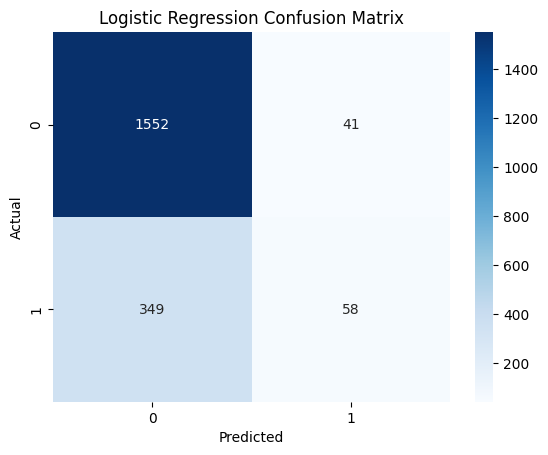

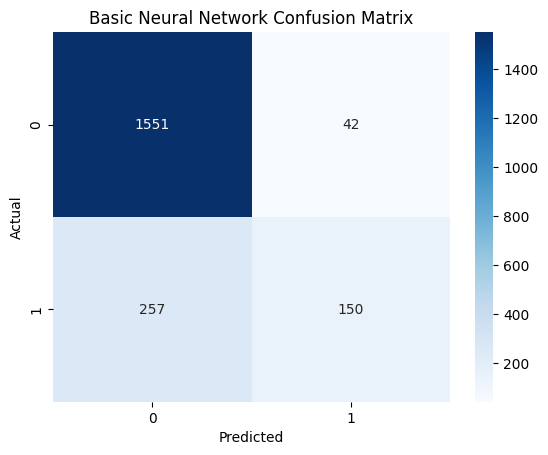

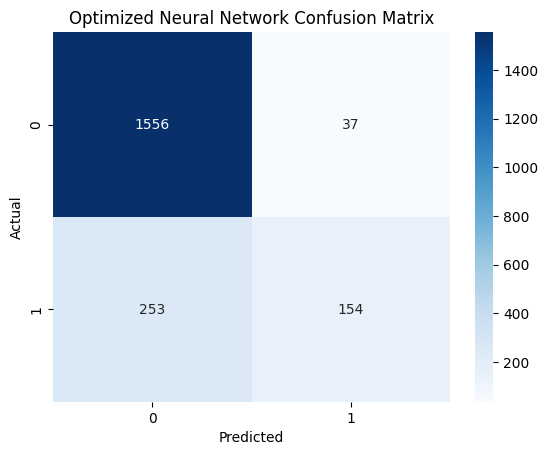

ROC-AUC Scores:
Logistic Regression: 0.558384270248677
Basic Neural Network: 0.6710925100755609
Optimized Neural Network: 0.6775758809657115


In [19]:
# ---- Performance Comparison ----
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn, "Basic Neural Network Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn_opt, "Optimized Neural Network Confusion Matrix")

# ROC-AUC Score Comparison
print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, y_pred_log))
print("Basic Neural Network:", roc_auc_score(y_test, y_pred_nn))
print("Optimized Neural Network:", roc_auc_score(y_test, y_pred_nn_opt))